## Visualizing results -  Original Geoparser

We have run the [Edinburgh geoparser](https://programminghistorian.org/en/lessons/geoparsing-text-with-edinburgh#patch-fix) to extract and resolvoe locations contained within the **First Volumne, of the First Edition, Volume 1, A-B** (year 1771) of the *Encyclopaedia Britannica*, which has 832 pages.
                             
The query for running that we have used is the following: 

`spark-submit --py-files defoe.zip defoe/run_query.py nls_subsample.txt nls defoe.nls.queries.geoparser_pages -r geopaser_original_EB_144133901 -n 16`

The nls_subsample.txt has the path of this particular book that we are exploring:

`xxx/nls-data-encyclopaediaBritannica/144133901`

The results file ( [geopaser_original_EB_144133901](http://localhost:8888/edit/results_NLS/geopaser_original_EB_144133901)) is stored in this repository under the *results_NLS* subdirectory. 


### Loading the necessary libraries

In [1]:
import yaml
from IPython.core.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

### Functions

In [2]:
def read_query_results(filename):
    with open('./results_NLS/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [3]:
def geresolution_dataframe(result):
    dfs=[]
    data=[]
    c_locs=[]
    for i in result.keys():
        t_ind = 0
        e_ind = 0
        for k in result[i]:
            locs= k["georesolution_page"]
            page = k["text_unit id"]
       
            if locs != {}:
                data=[]
                l_ind = 0
                for i in locs:
                    if type(locs[i]) == type([]) :
                        c_locs=locs[i].copy()
                        c_locs.append(i.split("-")[0])
                        c_locs.append(page)
                        data.append(c_locs)
                        l_ind = l_ind + 1   
                e_ind = t_ind + l_ind 
                if data:
                    df_page = pd.DataFrame(data, columns = ['Latitude', 'Longitude', 'Place', 'Page'], 
                                      index=list(range(t_ind, e_ind)))
                    dfs.append(df_page)
                    t_ind=e_ind
    df_total = pd.concat(dfs)
    return df_total

In [4]:
def get_place(df, lat, long):
    df_new=df.loc[(df['Latitude'] == lat) & (df_total['Longitude'] == long)]['Place']
    return df_new.count(), df_new.iloc[0]

In [38]:
def label_freq_places(df_total, df_max_geolocations, filter_list):
    place_label=[]
    place_freq = []
    i_limit = 15
    i =0
    k =0 
    while k < i_limit:
        place_count, place_name = get_place(df_total, df_max_geolocations.iloc[i]['Latitude'], df_max_geolocations.iloc[i]['Longitude'])
        if place_name not in filter_list:
            print(i, place_count,place_name)
            if place_name not in place_label:
                k = k + 1
            place_label.append(place_name)
            place_freq.append(place_count)
         
        i = i + 1
    return place_label, place_freq

In [68]:
def plot_bar_places(df_group_places):
    # this is for plotting purpose
    index = np.arange(len(df_group_places['place_label']))
    plt.bar(index, df_group_places['count'], color='orange')
    plt.xlabel('Places')
    plt.ylabel('Frequency of Places')
    plt.xticks(index, df_group_places['place_label'], rotation=40, fontsize=8)
    plt.title('15 Places most mentioned in the using the Original Geoparser')

### Information about the defoe geoparser query

This query does the following tasks:

- Ingests all the pages from the directory "144133901",  which corresponds to the book "Encyclopaedia Britannica; or, A dictionary of arts and sciences, compiled upon a new plan … - First edition, 1771, Volume 1, A-B - EB.1"
- Cleans the text applied two fixes: Long-s and hyphen words
- Identifies *entities* using the original geotagging of the Edinburgh geoparser. 
- From the previous entities, just selects the one about *location* and creates an xml (in memory) per page with these "location" entities. 
- Applies the georesolve of the Edinburgh geoparser to each xml and gets lat and long. **Important: Everything is in memory, we do not create XML files in those steps**
- Group the results by Book's title, and also gets some informative metadata

As a result we get a file per gazetter|book with an entry per page with the following information:

    * archive_filename: Path to the gazetteer 
    * clean_text: Page's clean text after applying 2 fixes: long-S and hyphenate words
    * edition: Edition of the gazetteer
    * georesolution_page: Page's geolocations after applying the georesolver
    * model: defoe model – could be fmp|nls|papers|alto. In this case is “nls”
    * text_unit: page (for other defoe models could be “article”)
    * num_text_unit: number of tex units. In this case, number of pages of this particular book (e.g. 832)
    * page_filename: Page's filename (page's relative path)
    * text_unit id: The number of this page (e.g. Page 1)
    * lang_model : The language model applied (original_geoparser)
    * type_distribution: type of document (newspaper|book). In this case is "book". 
    * year: Publication year 


Example:
 - edition: First edition, 1771, Volume 1, A-B
   georesolution_page:
    SCOTLAND-rb3:
    - '33.64836'
    - '-98.46944999999999'
 - lang_model: geoparser_original
 - page_filename: alto/188082826.34.xml
 - text_unit id: Page9
 - year: 1771



In [7]:
results=read_query_results('geoparser_original_EB_144133901')

In [8]:
df_total= geresolution_dataframe(results)

In [9]:
df_total[["Place"]].count()

Place    5872
dtype: int64

In [72]:
df_total["Place"]= df_total["Place"].str.capitalize()

In [73]:
df_total.groupby("Place").count()

,Latitude,Longitude,Page
Place,,,
Aach,1,1,1
Aade,1,1,1
Aar,1,1,1
Aat,1,1,1
Abaca,1,1,1
Abach,1,1,1
Abaco,1,1,1
Abadan,1,1,1
Abadir,1,1,1


In [74]:
#df_total.groupby("Page").count()

In [75]:
#df_total.groupby(["Latitude", "Longitude"]).count()

In [76]:
df_filter = df_total[['Latitude','Longitude']].groupby(['Latitude', 'Longitude'])['Longitude'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)   

df_max_geolocations = df_filter.drop(0)

df_max_geolocations.head(15)


,Latitude,Longitude,count
467,34.6120507,-82.765139,83
952,39.7528767,-77.1330392,50
496,35.1673393,-82.0267752,46
2153,50.6391735835358,3.07591438293457,44
1306,41.9291973,-87.86200650000001,41
897,39.2867738,-76.6010777,40
799,38.8873341,-77.05553279999999,39
274,26.29902,-81.7974,38
2550,9.550599999999999,122.5164,35
521,35.4556684,-82.5981795,34


In [78]:
#Getting the 15 places (and their frequencies) most mentioned
filter_list=['Jupiter', 'Venus, a d p', 'Saturn']
place_label, place_freq = label_freq_places(df_total, df_max_geolocations, filter_list)
    

0 83 France
1 50 Germany
2 46 Africa
3 44 Europe
4 41 America
5 40 Italy
6 39 Scotland
7 38 Naples
8 35 Asia
9 34 Spain
10 34 England
11 33 Venice
13 32 France
15 29 America
17 27 France
18 26 Britain
19 23 Ethiopia
20 23 France
21 23 Rome


In [79]:
#Visualizing the 15 places in a Bar plot
df_places = {'place_label':place_label,'place_freq':place_freq}
df_places_freq = pd.DataFrame(df_places_freq)
df_group_places = df_places_freq.groupby(['place_label'])['place_freq'].sum()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)   


df_group_places

,place_label,count
7,France,165
1,America,70
8,Germany,50
0,Africa,46
6,Europe,44
9,Italy,40
12,Scotland,39
10,Naples,38
2,Asia,35
4,England,34


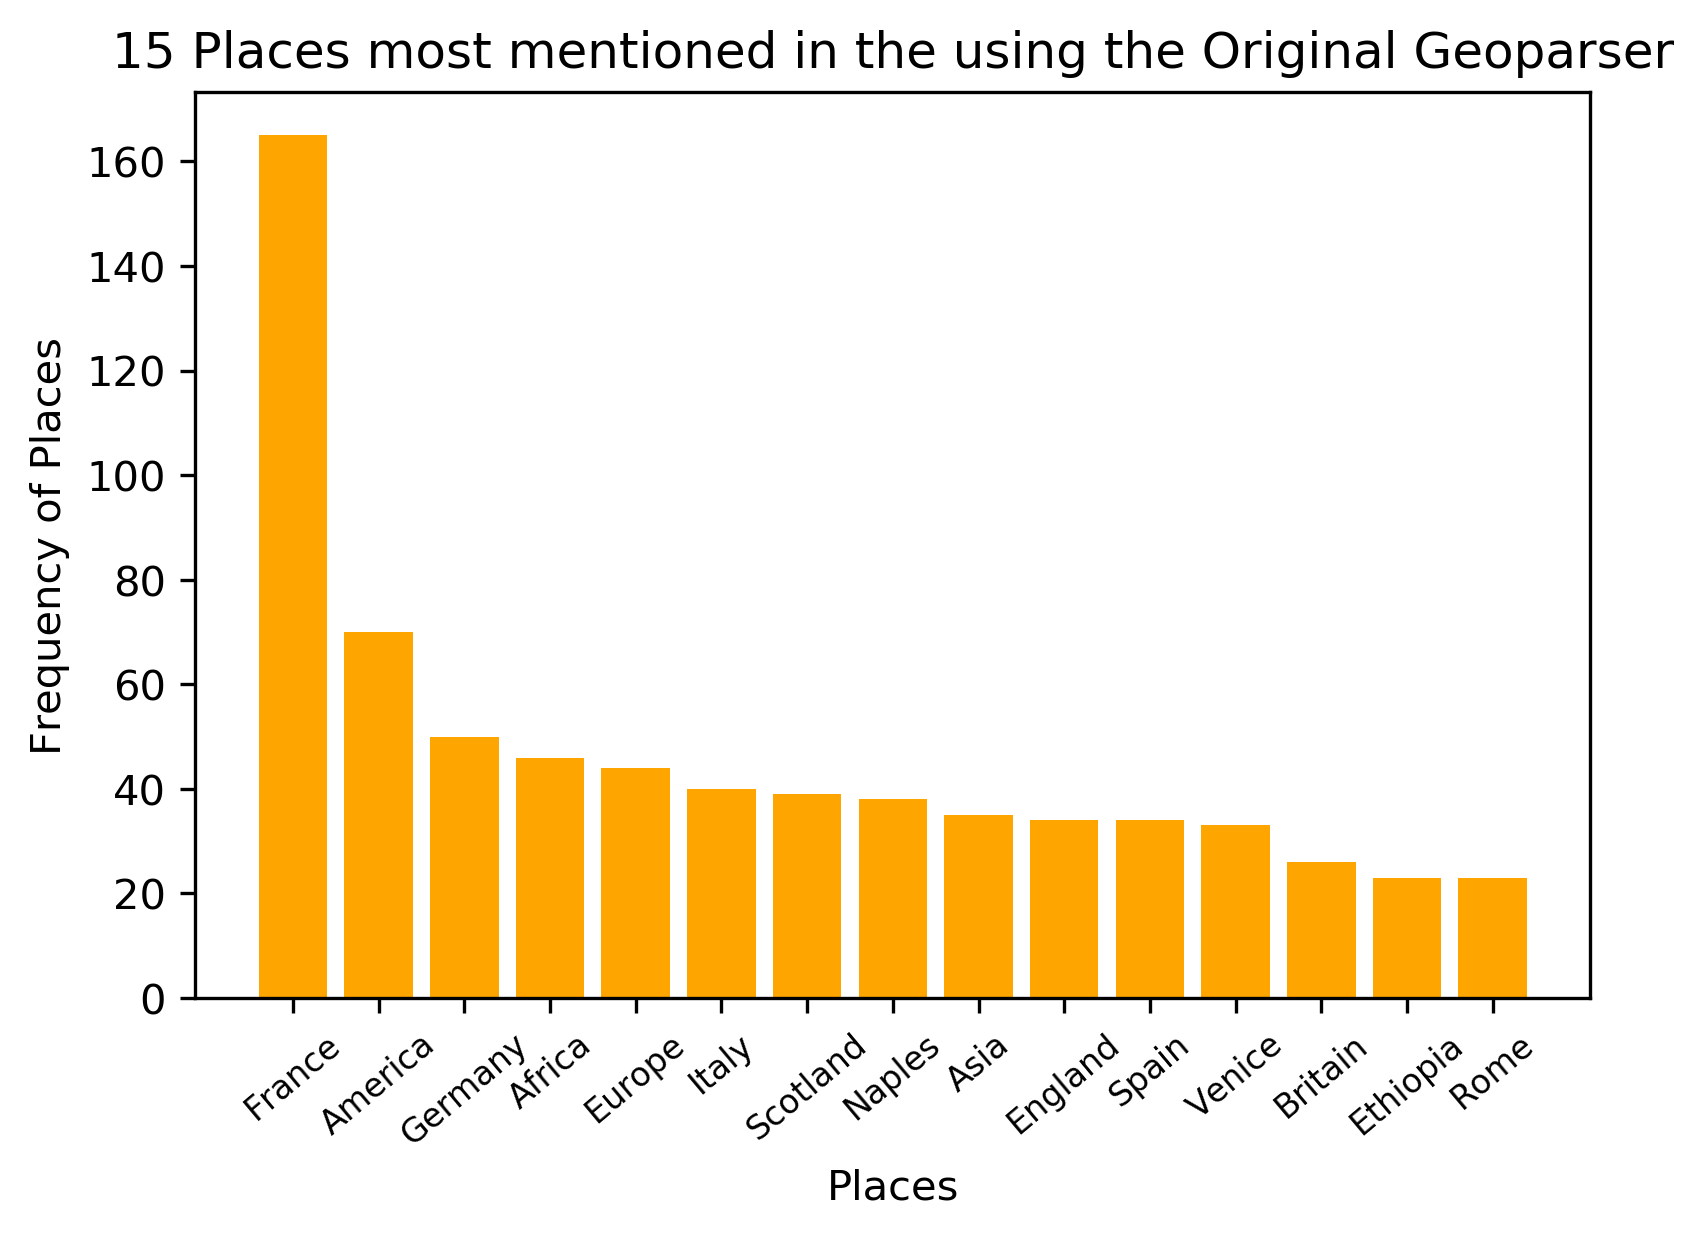

In [80]:
mpl.rcParams['figure.dpi']=300
plot_bar_places(df_group_places)